In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
!kaggle datasets download -d agungmrf/indonesian-sign-language-bisindo

 99% 1.35G/1.36G [00:06<00:00, 183MB/s]
100% 1.36G/1.36G [00:06<00:00, 228MB/s]


In [4]:
! unzip indonesian-sign-language-bisindo.zip -d bisindo

Streaming output truncated to the last 5000 lines.
  inflating: bisindo/bisindo/labels/train/S/flip039.txt  
  inflating: bisindo/bisindo/labels/train/S/flip040.txt  
  inflating: bisindo/bisindo/labels/train/S/flip042.txt  
  inflating: bisindo/bisindo/labels/train/S/flip043.txt  
  inflating: bisindo/bisindo/labels/train/S/flip044.txt  
  inflating: bisindo/bisindo/labels/train/S/flip045.txt  
  inflating: bisindo/bisindo/labels/train/S/flip046.txt  
  inflating: bisindo/bisindo/labels/train/S/flip047.txt  
  inflating: bisindo/bisindo/labels/train/S/flip049.txt  
  inflating: bisindo/bisindo/labels/train/S/flip050.txt  
  inflating: bisindo/bisindo/labels/train/S/flip051.txt  
  inflating: bisindo/bisindo/labels/train/S/flip052.txt  
  inflating: bisindo/bisindo/labels/train/S/flip053.txt  
  inflating: bisindo/bisindo/labels/train/S/flip056.txt  
  inflating: bisindo/bisindo/labels/train/S/flip057.txt  
  inflating: bisindo/bisindo/labels/train/S/flip058.txt  
  inflating: bisindo/

In [5]:
train_dir = 'bisindo/bisindo/images/train'
val_dir = 'bisindo/bisindo/images/val'

In [6]:
os.listdir(train_dir)

['K',
 'H',
 'R',
 'J',
 'W',
 'U',
 'Y',
 'D',
 'O',
 'F',
 'Q',
 'T',
 'X',
 'P',
 'L',
 'C',
 'Z',
 'V',
 'G',
 'E',
 'B',
 'I',
 'N',
 'A',
 'S',
 'M']

In [7]:
os.listdir(val_dir)

['K',
 'H',
 'R',
 'J',
 'W',
 'U',
 'Y',
 'D',
 'O',
 'F',
 'Q',
 'T',
 'X',
 'P',
 'L',
 'C',
 'Z',
 'V',
 'G',
 'E',
 'B',
 'I',
 'N',
 'A',
 'S',
 'M']

In [8]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical')

Found 9169 images belonging to 26 classes.
Found 2301 images belonging to 26 classes.


**<h1>Model 1</h1>**

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [13]:
model_history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 26s - loss: 3.4888 - accuracy: 0.0350 - val_loss: 3.2576 - val_accuracy: 0.0500 - 26s/epoch - 1s/step
Epoch 2/20
25/25 - 17s - loss: 3.2589 - accuracy: 0.0356 - val_loss: 3.2574 - val_accuracy: 0.0250 - 17s/epoch - 673ms/step
Epoch 3/20
25/25 - 17s - loss: 3.2574 - accuracy: 0.0463 - val_loss: 3.2539 - val_accuracy: 0.0437 - 17s/epoch - 675ms/step
Epoch 4/20
25/25 - 18s - loss: 3.1912 - accuracy: 0.0787 - val_loss: 2.8255 - val_accuracy: 0.2313 - 18s/epoch - 726ms/step
Epoch 5/20
25/25 - 20s - loss: 2.7191 - accuracy: 0.2338 - val_loss: 2.5406 - val_accuracy: 0.3594 - 20s/epoch - 783ms/step
Epoch 6/20
25/25 - 17s - loss: 1.8342 - accuracy: 0.5068 - val_loss: 1.8204 - val_accuracy: 0.5375 - 17s/epoch - 670ms/step
Epoch 7/20
25/25 - 17s - loss: 1.4056 - accuracy: 0.6231 - val_loss: 1.2587 - val_accuracy: 0.6812 - 17s/epoch - 691ms/step
Epoch 8/20
25/25 - 16s - loss: 1.0990 - accuracy: 0.6981 - val_loss: 0.8906 - val_accuracy: 0.7781 - 16s/epoch - 659ms/step
Epoch 9/20


In [14]:
train_loss_1 = model_history.history['loss']
val_loss_1 = model_history.history['val_loss']
train_acc_1 = model_history.history['accuracy']
val_acc_1 = model_history.history['val_accuracy']
epochs_1 = range(1, len(train_loss_1) + 1)

**<h1>Model 2</h1>**

In [15]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='selu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='selu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='selu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(512, (3,3), activation='selu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='selu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 36, 36, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)      

In [17]:
model2.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [18]:
model_history2 = model2.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 21s - loss: 56.7530 - accuracy: 0.0344 - val_loss: 5.4994 - val_accuracy: 0.0500 - 21s/epoch - 853ms/step
Epoch 2/20
25/25 - 17s - loss: 6.6107 - accuracy: 0.0618 - val_loss: 9.1708 - val_accuracy: 0.0437 - 17s/epoch - 685ms/step
Epoch 3/20
25/25 - 18s - loss: 12.1458 - accuracy: 0.0700 - val_loss: 3.2711 - val_accuracy: 0.2125 - 18s/epoch - 709ms/step
Epoch 4/20
25/25 - 18s - loss: 4.7516 - accuracy: 0.1875 - val_loss: 5.6454 - val_accuracy: 0.1125 - 18s/epoch - 713ms/step
Epoch 5/20
25/25 - 20s - loss: 3.7931 - accuracy: 0.2275 - val_loss: 5.8810 - val_accuracy: 0.3187 - 20s/epoch - 797ms/step
Epoch 6/20
25/25 - 19s - loss: 7.3967 - accuracy: 0.2575 - val_loss: 2.3612 - val_accuracy: 0.4906 - 19s/epoch - 780ms/step
Epoch 7/20
25/25 - 17s - loss: 2.0223 - accuracy: 0.5126 - val_loss: 1.6950 - val_accuracy: 0.6750 - 17s/epoch - 685ms/step
Epoch 8/20
25/25 - 18s - loss: 2.8699 - accuracy: 0.4538 - val_loss: 6.5740 - val_accuracy: 0.4250 - 18s/epoch - 732ms/step
Epoch 

In [19]:
train_loss_2 = model_history2.history['loss']
val_loss_2 = model_history2.history['val_loss']
train_acc_2 = model_history2.history['accuracy']
val_acc_2 = model_history2.history['val_accuracy']
epochs_2 = range(1, len(train_loss_2) + 1)

**<h1>Model 3</h1>**

In [20]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [21]:
model3.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
model_history3 = model3.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 25s - loss: 3.4692 - accuracy: 0.0400 - val_loss: 3.2569 - val_accuracy: 0.0531 - 25s/epoch - 984ms/step
Epoch 2/20
25/25 - 18s - loss: 3.2555 - accuracy: 0.0419 - val_loss: 3.2467 - val_accuracy: 0.0594 - 18s/epoch - 709ms/step
Epoch 3/20
25/25 - 17s - loss: 3.2078 - accuracy: 0.0731 - val_loss: 3.0141 - val_accuracy: 0.1156 - 17s/epoch - 695ms/step
Epoch 4/20
25/25 - 20s - loss: 2.4432 - accuracy: 0.3113 - val_loss: 2.0084 - val_accuracy: 0.4688 - 20s/epoch - 801ms/step
Epoch 5/20
25/25 - 17s - loss: 1.8101 - accuracy: 0.5188 - val_loss: 1.5271 - val_accuracy: 0.6719 - 17s/epoch - 675ms/step
Epoch 6/20
25/25 - 17s - loss: 1.4639 - accuracy: 0.6369 - val_loss: 1.2113 - val_accuracy: 0.7219 - 17s/epoch - 688ms/step
Epoch 7/20
25/25 - 17s - loss: 1.3030 - accuracy: 0.6825 - val_loss: 1.1233 - val_accuracy: 0.7188 - 17s/epoch - 691ms/step
Epoch 8/20
25/25 - 19s - loss: 1.1688 - accuracy: 0.7050 - val_loss: 1.1530 - val_accuracy: 0.6938 - 19s/epoch - 765ms/step
Epoch 9/

In [23]:
train_loss_3 = model_history3.history['loss']
val_loss_3 = model_history3.history['val_loss']
train_acc_3 = model_history3.history['accuracy']
val_acc_3 = model_history3.history['val_accuracy']
epochs_3 = range(1, len(train_loss_3) + 1)

**<h1>Model 4</h1>**

In [24]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='selu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='selu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='selu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(512, (3,3), activation='selu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='selu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [25]:
model4.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [26]:
model_history4 = model4.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 21s - loss: 13.5962 - accuracy: 0.0344 - val_loss: 12.7532 - val_accuracy: 0.0531 - 21s/epoch - 859ms/step
Epoch 2/20
25/25 - 18s - loss: 5.5359 - accuracy: 0.0613 - val_loss: 4.9161 - val_accuracy: 0.1688 - 18s/epoch - 709ms/step
Epoch 3/20
25/25 - 18s - loss: 3.5143 - accuracy: 0.1175 - val_loss: 10.9503 - val_accuracy: 0.0688 - 18s/epoch - 736ms/step
Epoch 4/20
25/25 - 17s - loss: 2.5053 - accuracy: 0.3187 - val_loss: 12.5545 - val_accuracy: 0.0656 - 17s/epoch - 691ms/step
Epoch 5/20
25/25 - 17s - loss: 1.9612 - accuracy: 0.4950 - val_loss: 7.5593 - val_accuracy: 0.1312 - 17s/epoch - 693ms/step
Epoch 6/20
25/25 - 17s - loss: 1.6366 - accuracy: 0.5756 - val_loss: 3.8288 - val_accuracy: 0.4125 - 17s/epoch - 699ms/step
Epoch 7/20
25/25 - 20s - loss: 1.4549 - accuracy: 0.6331 - val_loss: 4.1173 - val_accuracy: 0.3844 - 20s/epoch - 796ms/step
Epoch 8/20
25/25 - 22s - loss: 1.2657 - accuracy: 0.6819 - val_loss: 2.3124 - val_accuracy: 0.5063 - 22s/epoch - 870ms/step
Epoc

In [27]:
train_loss_4 = model_history4.history['loss']
val_loss_4 = model_history4.history['val_loss']
train_acc_4 = model_history4.history['accuracy']
val_acc_4 = model_history4.history['val_accuracy']
epochs_4 = range(1, len(train_loss_4) + 1)

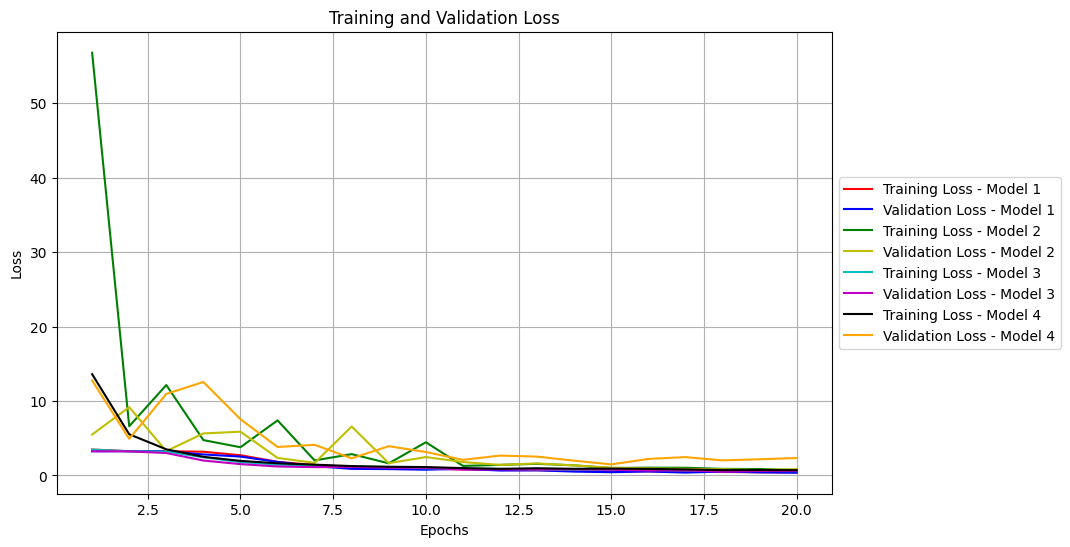

In [28]:
plt.figure(figsize=(10, 6))

plt.plot(epochs_1, train_loss_1, 'r', label='Training Loss - Model 1')
plt.plot(epochs_1, val_loss_1, 'b', label='Validation Loss - Model 1')
plt.plot(epochs_2, train_loss_2, 'g', label='Training Loss - Model 2')
plt.plot(epochs_2, val_loss_2, 'y', label='Validation Loss - Model 2')
plt.plot(epochs_3, train_loss_3, 'c', label='Training Loss - Model 3')
plt.plot(epochs_3, val_loss_3, 'm', label='Validation Loss - Model 3')
plt.plot(epochs_4, train_loss_4, 'k', label='Training Loss - Model 4')
plt.plot(epochs_4, val_loss_4, 'orange', label='Validation Loss - Model 4')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

# Menempatkan legenda di luar plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

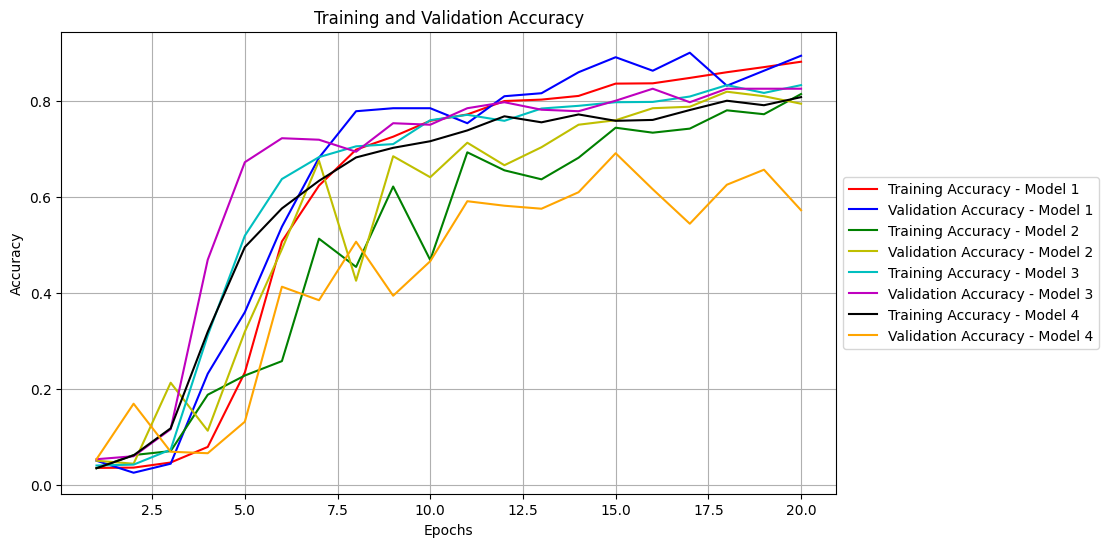

In [29]:
plt.figure(figsize=(10, 6))

plt.plot(epochs_1, train_acc_1, 'r', label='Training Accuracy - Model 1')
plt.plot(epochs_1, val_acc_1, 'b', label='Validation Accuracy - Model 1')
plt.plot(epochs_2, train_acc_2, 'g', label='Training Accuracy - Model 2')
plt.plot(epochs_2, val_acc_2, 'y', label='Validation Accuracy - Model 2')
plt.plot(epochs_3, train_acc_3, 'c', label='Training Accuracy - Model 3')
plt.plot(epochs_3, val_acc_3, 'm', label='Validation Accuracy - Model 3')
plt.plot(epochs_4, train_acc_4, 'k', label='Training Accuracy - Model 4')
plt.plot(epochs_4, val_acc_4, 'orange', label='Validation Accuracy - Model 4')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# Menempatkan legenda di luar plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Saving WIN_20240110_18_27_23_Pro.jpg to WIN_20240110_18_27_23_Pro.jpg
1/1 [==============================] - 0s 18ms/step
WIN_20240110_18_27_23_Pro.jpg
Predicted Class: A


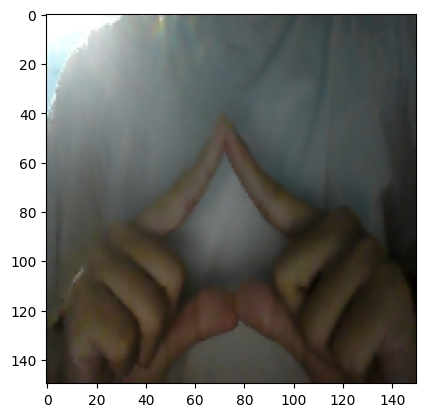

In [39]:
uploaded = files.upload()

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    predicted_class = np.argmax(classes, axis=1)[0]
    print(fn)
    print('Predicted Class:', class_names[predicted_class])